In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# STEP1: reading the data from file to process
#-----------------------------------------------------------------------------------------
loan = pd.read_csv('C:/hk/education/upGrad/EDA_Case_Study/loan.csv')
print(loan)
print("*************************")
print(loan.columns.tolist())
#print("*************************")
loan.info()
#df.shape
#df.head()
#df.columns

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%     

c:\users\harishk2\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# STEP1: remove all columns which have only null values
#-----------------------------------------------------------------------------------------
loan_processed=loan.dropna(how="all", axis=1)

In [5]:
print(loan_processed)
print("*************************")
print(loan_processed.columns.tolist())
print("*************************")
loan_processed.info()

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...          NaN   
1    

In [6]:
#STEP2: remove all columns which have same values in the column
#-----------------------------------------------------------------------------------------
loan_processed=loan_processed[[i for i in loan_processed.columns if(len(loan_processed.loc[:,i].unique())!=1)]]

In [7]:
print(loan_processed)
print("*************************")
print(loan_processed.columns.tolist())
print("*************************")
loan_processed.info()

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... recoveries  \
0       36 months   10.65%       162.87     B        B2  ...       0.00   
1       6

In [8]:
#STEP3: remove columns which have same quantils at 25,50 and 75
#-----------------------------------------------------------------------------------------
def checkSameQuantile(t,i):
    if t.loc[:,i].dtypes==np.object:
        return(0)
    if (t.loc[:,i].quantile(0.25)==t.loc[:,i].quantile(0.50)==t.loc[:,i].quantile(0.75)):
        return(1)
    return(0)
loan_processed=loan_processed[[i for i in loan_processed.columns if(checkSameQuantile(loan_processed,i)!=1)]]

c:\users\harishk2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [9]:
print(loan_processed)
print("*************************")
print(loan_processed.columns.tolist())
print("*************************")
loan_processed.info()

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... revol_util  \
0       36 months   10.65%       162.87     B        B2  ...     83.70%   
1       6

In [10]:
### Steps: fix null value
#trying to indentify the columns which mostly have null values and deleted as they will be difficult to fix.
#confir that these few values are of no analytical value before deleting the column

<AxesSubplot:>

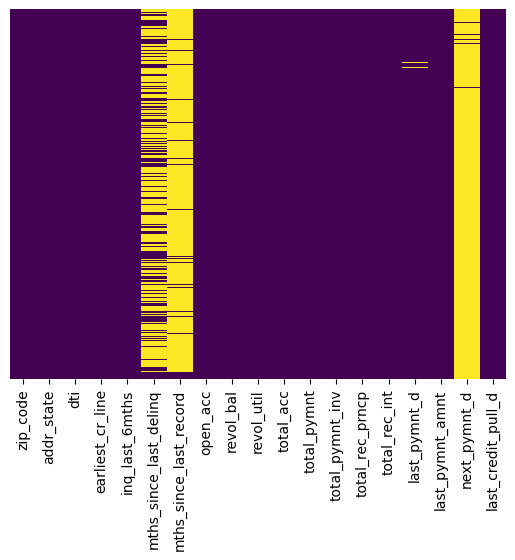

In [11]:
# STEP: visualizing data to analyze null colums
sns.heatmap(loan_processed.iloc[:, 21:].isnull(),yticklabels=False,cbar=False, cmap='viridis' )

<AxesSubplot:>

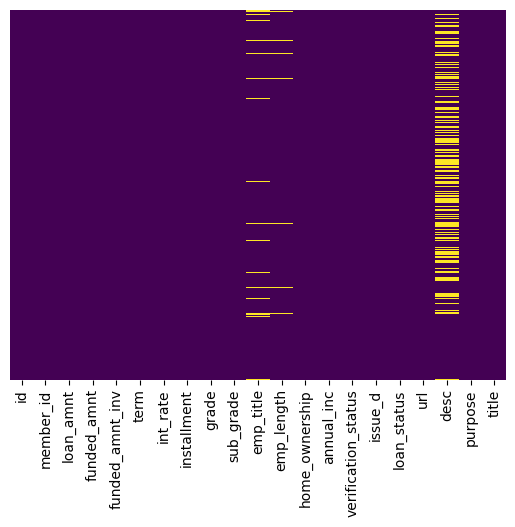

In [12]:
# STEP: visualizing data to analyze null colums
sns.heatmap(loan_processed.iloc[:, 0:21].isnull(),yticklabels=False,cbar=False, cmap='viridis' )

In [13]:
# with visualization we are able to see few columns which are mostly having null 
# values and are not of much value for analysis
loan_processed=loan_processed.drop(['next_pymnt_d', 'mths_since_last_record'], axis=1)

In [14]:
loan_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  object 
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

In [15]:
# removing the fields which as described in the dictionary are of little or no value for analysis
loan_processed=loan_processed.drop(['id','member_id','desc','emp_title','sub_grade' ,'url' ,'issue_d','title','zip_code','addr_state','earliest_cr_line','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis=1)


In [16]:
loan_processed

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,...,1,NaN,3,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,...,5,NaN,3,1687,9.40%,4,1008.710000,1008.71,456.46,435.17
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,...,2,NaN,2,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,...,1,35.0,10,5598,21%,37,12231.890000,12231.89,10000.00,2214.92
4,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,...,0,38.0,15,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,MORTGAGE,110000.0,...,0,0.0,13,7274,13.10%,40,2822.969293,1213.88,2500.00,322.97
39713,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,RENT,18000.0,...,1,5.0,6,8847,26.90%,9,9913.491822,1020.51,8500.00,1413.49
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,100000.0,...,0,0.0,11,9698,19.40%,20,5272.161128,1397.12,5000.00,272.16
39715,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,200000.0,...,0,0.0,17,85607,0.70%,26,5174.198551,672.66,5000.00,174.20


In [17]:
loan_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  loan_status             39717 non-null  object 
 12  purpose                 39717 non-null  object 
 13  dti                     39717 non-null  float64
 14  inq_last_6mths          39717 non-null

## converting columns from string to a number for better analysis

In [18]:
# loan_status - coverting loan_status from objec to int64
loan_processed=loan_processed
loan_processed['loan_status']=loan_processed['loan_status'].apply(lambda x:1 if x=='Charged Off' else 0)
loan_processed['loan_status']=loan_processed['loan_status'].apply(lambda x:pd.to_numeric(x))


# term - coverting term from objec to int64
loan_processed=loan_processed
loan_processed['term']=loan_processed['term'].apply(lambda x:36 if x==' 36 months' else 60)
loan_processed['term']=loan_processed['term'].apply(lambda x:pd.to_numeric(x))

# int_rate - coverting term from objec to int64
loan_processed['int_rate']=loan_processed['int_rate'].apply(lambda x:pd.to_numeric(x.split('%')[0]))

# int_rate - coverting term from objec to int64
loan_processed['grade']=loan_processed['grade'].apply(lambda x:1 if x=='A' else x)
loan_processed['grade']=loan_processed['grade'].apply(lambda x:2 if x=='B' else x)
loan_processed['grade']=loan_processed['grade'].apply(lambda x:3 if x=='C' else x)
loan_processed['grade']=loan_processed['grade'].apply(lambda x:4 if x=='D' else x)
loan_processed['grade']=loan_processed['grade'].apply(lambda x:5 if x=='E' else x)
loan_processed['grade']=loan_processed['grade'].apply(lambda x:6 if x=='F' else x)
loan_processed['grade']=loan_processed['grade'].apply(lambda x:7 if x=='G' else x)

# fixing emp_length, which formats like '10+ years', '< 1 year', '2 years'
loan_processed["emp_length"]=loan_processed["emp_length"].str.replace("+", "") 
loan_processed["emp_length"]=loan_processed["emp_length"].str.replace("< ", "") 
loan_processed["emp_length"]=loan_processed["emp_length"].str.replace(" years", "") 
loan_processed["emp_length"]=loan_processed["emp_length"].str.replace(" year", "")
loan_processed['emp_length']=loan_processed['emp_length'].apply(lambda x:pd.to_numeric(x))

# int_rate - coverting term from objec to int64
loan_processed['verification_status']=loan_processed['verification_status'].apply(lambda x:0 if x=='Not Verified' else 1)

# purpose - coverting term from objec to int64
p=loan_processed['purpose'].value_counts()
pi=p.index.tolist()
pi.index('car')
loan_processed['purpose']=loan_processed['purpose'].apply(lambda x:pi.index(x))

#loan_processed['revol_util']=loan_processed['revol_util'].apply(lambda x:pd.to_numeric(x.split('%')[0]))
loan_processed['revol_util']=loan_processed['revol_util'].str.replace("%","")
loan_processed['revol_util']=loan_processed['revol_util'].apply(lambda x:pd.to_numeric(x))

# home_ownership - coverting term from objec to int64
loan_processed['home_ownership']=loan_processed['home_ownership'].apply(lambda x:1 if x=='RENT' else x)
loan_processed['home_ownership']=loan_processed['home_ownership'].apply(lambda x:2 if x=='MORTGAGE' else x)
loan_processed['home_ownership']=loan_processed['home_ownership'].apply(lambda x:3 if x=='OWN' else x)
loan_processed['home_ownership']=loan_processed['home_ownership'].apply(lambda x:4 if x=='OTHER' else x)
loan_processed['home_ownership']=loan_processed['home_ownership'].apply(lambda x:4 if x=='NONE' else x)


In [19]:
loan_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  int64  
 4   int_rate                39717 non-null  float64
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  int64  
 7   emp_length              38642 non-null  float64
 8   home_ownership          39717 non-null  int64  
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  int64  
 11  loan_status             39717 non-null  int64  
 12  purpose                 39717 non-null  int64  
 13  dti                     39717 non-null  float64
 14  inq_last_6mths          39717 non-null

In [20]:
loan_processed.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,38642.000000,39717.000000,3.971700e+04,...,39717.000000,14035.000000,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,2.577309,5.092050,1.606239,6.896893e+04,...,0.869200,35.900962,9.294408,13382.528086,48.832152,22.088828,12153.596544,11567.149118,9793.348813,2263.663172
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,1.387286,3.408338,0.638726,6.379377e+04,...,1.070219,22.020060,4.400282,15885.016641,28.332634,11.401709,9042.040766,8942.672613,7065.522127,2608.111964
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,1.000000,1.000000,1.000000,4.000000e+03,...,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,1.000000,2.000000,1.000000,4.040400e+04,...,0.000000,18.000000,6.000000,3703.000000,25.400000,13.000000,5576.930000,5112.310000,4600.000000,662.180000
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,2.000000,4.000000,2.000000,5.900000e+04,...,1.000000,34.000000,9.000000,8850.000000,49.300000,20.000000,9899.640319,9287.150000,8000.000000,1348.910000
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,3.000000,9.000000,2.000000,8.230000e+04,...,1.000000,52.000000,12.000000,17058.000000,72.400000,29.000000,16534.433040,15798.810000,13653.260000,2833.400000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,7.000000,10.000000,4.000000,6.000000e+06,...,8.000000,120.000000,44.000000,149588.000000,99.900000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000


# Univariate Analysis

<AxesSubplot:>

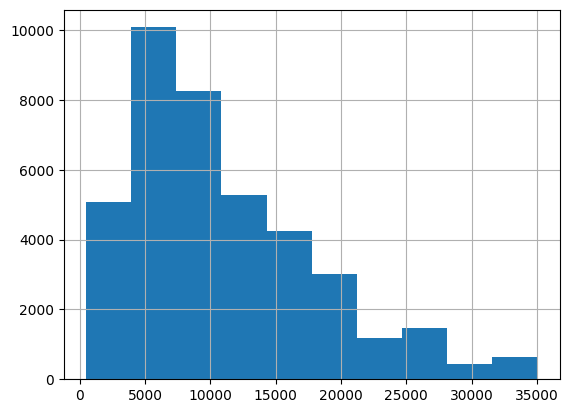

In [21]:
loan_processed['funded_amnt'].hist()

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

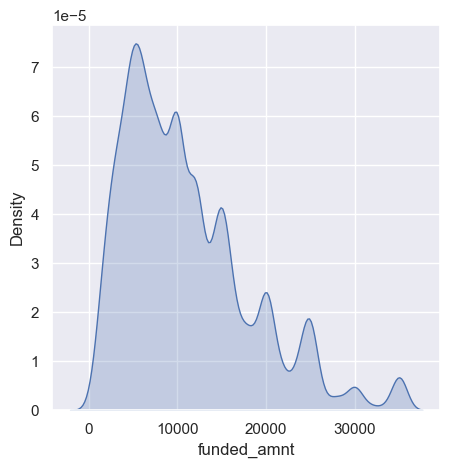

In [22]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(loan['funded_amnt'],fill=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21faf19e0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x21faf1afa58>,
 'boxes': [<matplotlib.lines.Line2D at 0x21faf1af240>],
 'medians': [<matplotlib.lines.Line2D at 0x21faf19e080>],
 'fliers': [<matplotlib.lines.Line2D at 0x21faf1afcf8>],
 'means': []}

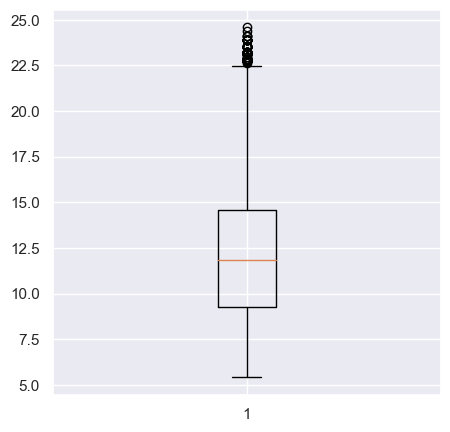

In [23]:
plt.boxplot(loan_processed['int_rate'])

<AxesSubplot:>

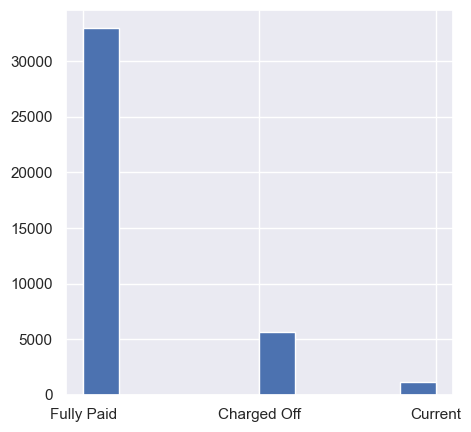

In [24]:
loan['loan_status'].hist()


<AxesSubplot:>

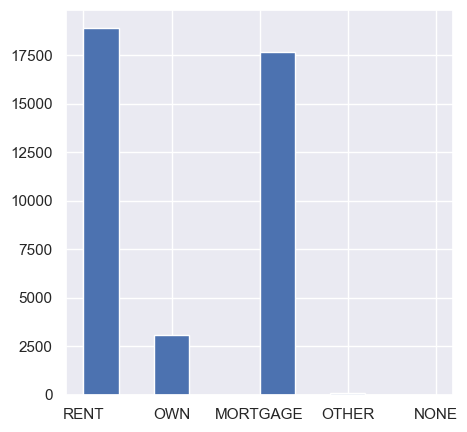

In [25]:
loan['home_ownership'].hist()

# Bivariate analysis

<AxesSubplot:xlabel='funded_amnt', ylabel='int_rate'>

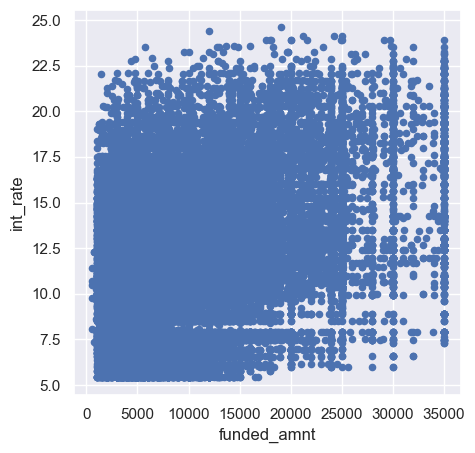

In [26]:
# reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')
loan_processed.plot.scatter(x='funded_amnt', y='int_rate')

<AxesSubplot:xlabel='funded_amnt', ylabel='int_rate'>

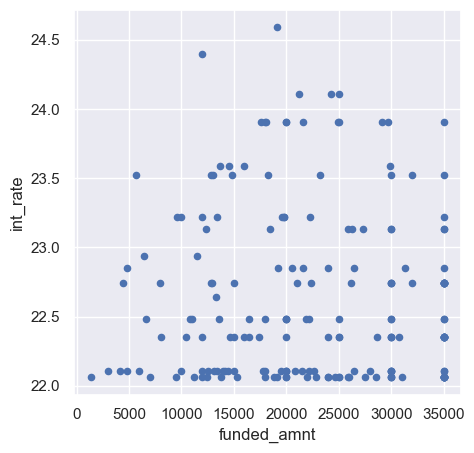

In [27]:
loan_processed[loan_processed['int_rate'] > 22].plot.scatter(x='funded_amnt', y='int_rate')

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

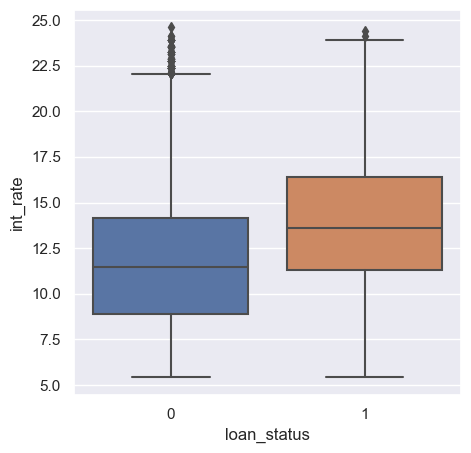

In [28]:
sns.boxplot(x='loan_status', y='int_rate', data=loan_processed)

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

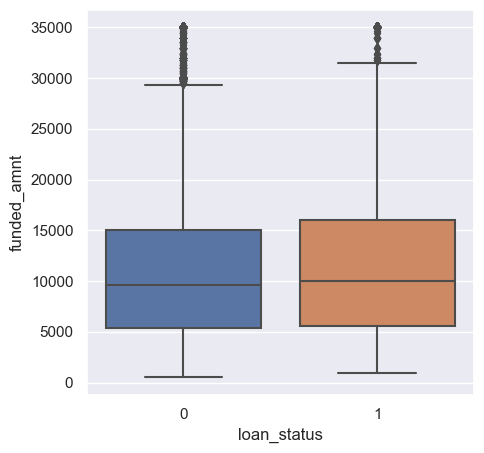

In [29]:
sns.boxplot(x='loan_status', y='funded_amnt', data=loan_processed)

In [30]:
corr1 = loan_processed.corr()['loan_status'].sort_values(ascending=False)
print('Most Positive Correlations:\n', corr1.head(10))
print('\nMost Negative Correlations:\n', corr1.tail(10))

Most Positive Correlations:
 loan_status            1.000000
int_rate               0.196253
grade                  0.190409
term                   0.146038
revol_util             0.096560
inq_last_6mths         0.071717
loan_amnt              0.048217
funded_amnt            0.045544
dti                    0.041701
verification_status    0.037280
Name: loan_status, dtype: float64

Most Negative Correlations:
 mths_since_last_delinq    0.004941
revol_bal                 0.003369
open_acc                 -0.010742
total_rec_int            -0.010780
home_ownership           -0.016313
total_acc                -0.023563
annual_inc               -0.041662
total_pymnt_inv          -0.236232
total_pymnt              -0.238844
total_rec_prncp          -0.335019
Name: loan_status, dtype: float64


In [34]:
loan_processed.corr().style.background_gradient(cmap="coolwarm").set_precision(3).set_table_styles(
    [
        dict(
            selector="th.col_heading",
            props=[
                ("writing-mode", "vertical-rl"),
                ("transform", "rotateZ(180deg)")#,
                #("height", "5px"),
            ],
        ),
    ]
)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
loan_amnt,1.000,0.982,0.940,0.361,0.309,0.930,0.290,0.154,0.105,0.271,0.323,0.048,-0.185,0.066,0.009,0.015,0.177,0.318,0.066,0.256,0.887,0.854,0.852,0.730
funded_amnt,0.982,1.000,0.958,0.341,0.313,0.956,0.291,0.154,0.101,0.267,0.318,0.046,-0.187,0.066,0.009,0.016,0.176,0.310,0.070,0.251,0.903,0.871,0.870,0.737
funded_amnt_inv,0.940,0.958,1.000,0.361,0.307,0.905,0.269,0.165,0.099,0.254,0.341,0.027,-0.188,0.075,-0.006,0.072,0.163,0.291,0.075,0.243,0.881,0.913,0.846,0.731
term,0.361,0.341,0.361,1.000,0.452,0.102,0.431,0.113,0.065,0.047,0.244,0.146,-0.033,0.082,0.041,0.038,0.051,0.072,0.070,0.096,0.334,0.350,0.222,0.530
int_rate,0.309,0.313,0.307,0.452,1.000,0.283,0.949,0.006,-0.063,0.053,0.189,0.196,-0.088,0.111,0.133,-0.056,0.010,0.097,0.467,-0.044,0.308,0.304,0.187,0.530
installment,0.930,0.956,0.905,0.102,0.283,1.000,0.267,0.125,0.080,0.271,0.272,0.023,-0.192,0.054,0.010,0.000,0.173,0.313,0.095,0.231,0.857,0.817,0.851,0.635
grade,0.290,0.291,0.269,0.431,0.949,0.267,1.000,0.004,-0.057,0.055,0.172,0.190,-0.076,0.096,0.116,-0.078,0.013,0.093,0.446,-0.038,0.289,0.271,0.169,0.511
emp_length,0.154,0.154,0.165,0.113,0.006,0.125,0.004,1.000,0.210,0.112,0.060,0.013,-0.039,0.051,0.009,0.046,0.097,0.154,0.012,0.207,0.139,0.149,0.129,0.126
home_ownership,0.105,0.101,0.099,0.065,-0.063,0.080,-0.057,0.210,1.000,0.117,0.008,-0.016,0.016,-0.022,0.063,-0.005,0.139,0.138,-0.100,0.227,0.091,0.090,0.094,0.056
annual_inc,0.271,0.267,0.254,0.047,0.053,0.271,0.055,0.112,0.117,1.000,0.107,-0.042,0.001,-0.123,0.034,-0.009,0.158,0.280,0.018,0.236,0.258,0.247,0.260,0.185


loan_processed.corr().style.background_gradient(cmap="coolwarm").set_precision(1).set_table_styles(
    [
        dict(
            selector="th.col_heading",
            props=[
                ("writing-mode", "vertical-rl"),
                ("transform", "rotateZ(180deg)")#,
                #("height", "5px"),
            ],
        ),
    ]
)

<AxesSubplot:xlabel='term', ylabel='funded_amnt'>

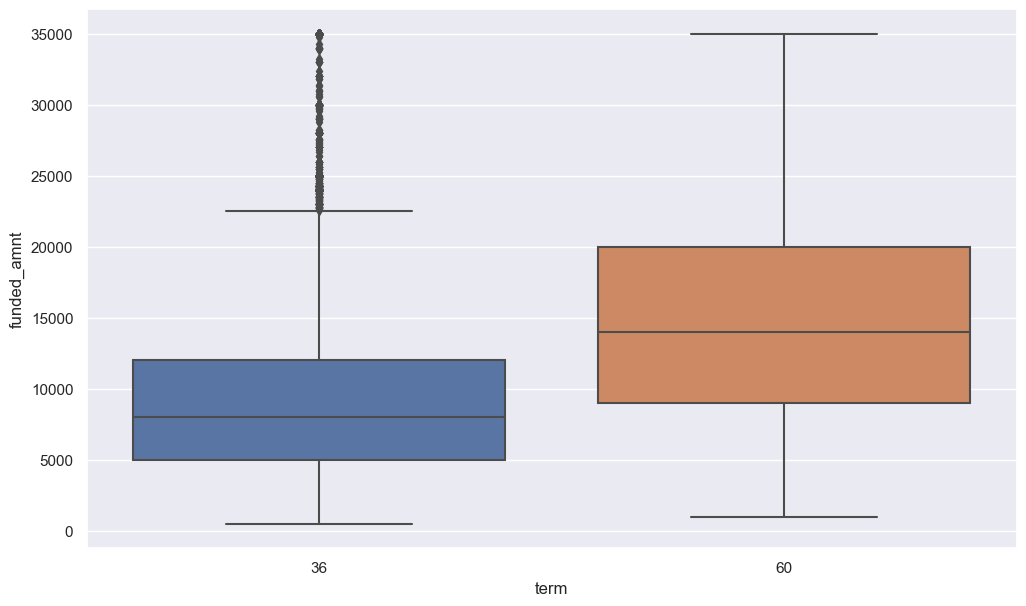

In [32]:
# STEP: boxplots for fixing null values by taking mean of the value in the colums
plt.figure(figsize=(12,7))
sns.boxplot(y='funded_amnt',x='term',data=loan_processed)

In [33]:
corr = loan_processed.corr().round(2)
corr

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
loan_amnt,1.00,0.98,0.94,0.36,0.31,0.93,0.29,0.15,0.11,0.27,...,0.01,0.01,0.18,0.32,0.07,0.26,0.89,0.85,0.85,0.73
funded_amnt,0.98,1.00,0.96,0.34,0.31,0.96,0.29,0.15,0.10,0.27,...,0.01,0.02,0.18,0.31,0.07,0.25,0.90,0.87,0.87,0.74
funded_amnt_inv,0.94,0.96,1.00,0.36,0.31,0.91,0.27,0.16,0.10,0.25,...,-0.01,0.07,0.16,0.29,0.07,0.24,0.88,0.91,0.85,0.73
term,0.36,0.34,0.36,1.00,0.45,0.10,0.43,0.11,0.07,0.05,...,0.04,0.04,0.05,0.07,0.07,0.10,0.33,0.35,0.22,0.53
int_rate,0.31,0.31,0.31,0.45,1.00,0.28,0.95,0.01,-0.06,0.05,...,0.13,-0.06,0.01,0.10,0.47,-0.04,0.31,0.30,0.19,0.53
installment,0.93,0.96,0.91,0.10,0.28,1.00,0.27,0.12,0.08,0.27,...,0.01,0.00,0.17,0.31,0.10,0.23,0.86,0.82,0.85,0.63
grade,0.29,0.29,0.27,0.43,0.95,0.27,1.00,0.00,-0.06,0.05,...,0.12,-0.08,0.01,0.09,0.45,-0.04,0.29,0.27,0.17,0.51
emp_length,0.15,0.15,0.16,0.11,0.01,0.12,0.00,1.00,0.21,0.11,...,0.01,0.05,0.10,0.15,0.01,0.21,0.14,0.15,0.13,0.13
home_ownership,0.11,0.10,0.10,0.07,-0.06,0.08,-0.06,0.21,1.00,0.12,...,0.06,-0.00,0.14,0.14,-0.10,0.23,0.09,0.09,0.09,0.06
annual_inc,0.27,0.27,0.25,0.05,0.05,0.27,0.05,0.11,0.12,1.00,...,0.03,-0.01,0.16,0.28,0.02,0.24,0.26,0.25,0.26,0.19
